In [3]:
import json  

with open('/content/intents1.json') as file:
    data = json.load(file)



In [44]:
import json
import random
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score



In [13]:
# Import the necessary library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split

# Convert text to features using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(sentences).toarray()
y = labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:

# 1. Data Cleaning and Preprocessing
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


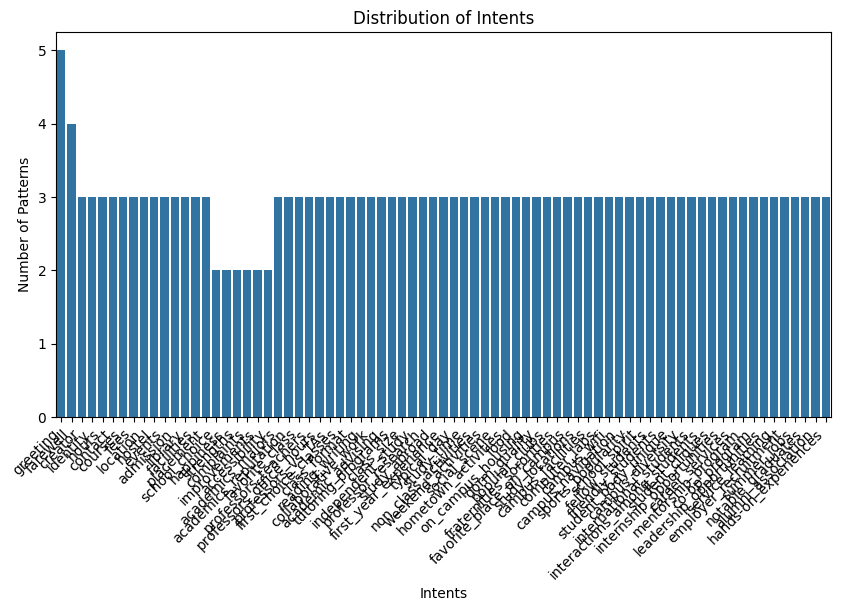

In [45]:
  import json
import random
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# ... (other imports)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # For POS tagging

  # 2. Data Visualization
# a. Intent Distribution
intent_counts = {intent['tag']: len(intent['patterns']) for intent in intents['intents']}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(intent_counts.keys()), y=list(intent_counts.values()))
plt.title('Distribution of Intents')
plt.xlabel('Intents')
plt.ylabel('Number of Patterns')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:

# Function to perform synonym replacement
def synonym_replacement(tokens, limit):
    augmented_sentences = []
    for i, token in enumerate(tokens):
        # Get synonyms for the current token
        synonyms = [lemma.name() for syn in wordnet.synsets(token) for lemma in syn.lemmas()]
        if synonyms:
            num_augmentations = min(limit, len(synonyms))
            sampled_synonyms = random.sample(synonyms, num_augmentations)
            for synonym in sampled_synonyms:
                augmented_tokens = tokens[:i] + [synonym] + tokens[i + 1:]
                augmented_sentences.append(' '.join(augmented_tokens))
    return augmented_sentences


In [19]:
# Function to augment intents data
def augment_intents_data(intents, limit_per_tag):
    text_data = []
    labels = []
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    for intent in intents['intents']:
        augmented_sentences_count = 0

        for example in intent['patterns']:
            # Tokenization and preprocessing
            tokens = nltk.word_tokenize(example.lower())
            filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

            if filtered_tokens:
                # Add original sentence
                text_data.append(' '.join(filtered_tokens))
                labels.append(intent['tag'])
                   # Generate augmented sentences
                augmented_sentences = synonym_replacement(filtered_tokens, limit_per_tag - augmented_sentences_count)
                for augmented_sentence in augmented_sentences:
                    text_data.append(augmented_sentence)
                    labels.append(intent['tag'])
                    augmented_sentences_count += 1

                    # Stop if the limit is reached
                    if augmented_sentences_count >= limit_per_tag:
                        break

    return text_data, labels

In [21]:
import json  # Add this line to import the json module

# Now read the file
with open('/content/intents1.json') as file:
    data = json.load(file)

# Now 'data' should contain the contents of the JSON file


In [23]:
import json

# Load the intents from a JSON file
with open('/content/intents1.json') as file:
    intents = json.load(file)

# Define the limit for augmented sentences per tag
limit_per_tag = 40

# Augment data (assuming augment_intents_data is already defined elsewhere)
text_data, labels = augment_intents_data(intents, limit_per_tag)


In [24]:
# Convert text to features using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(text_data).toarray()
y = labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Define different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Linear SVM': LinearSVC()
}

In [26]:
# Train and evaluate each model
best_model = None
best_accuracy = 0


In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

    # Save the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Logistic Regression Accuracy: 0.91
Naive Bayes Accuracy: 0.87
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.91
Linear SVM Accuracy: 0.91


In [28]:
# Function to predict the response
def get_response(user_input):
    # Preprocess the input
    tokens = nltk.word_tokenize(user_input)
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha()]
    user_input_features = vectorizer.transform([' '.join(filtered_tokens)]).toarray()


In [34]:
from google.colab import files

# Upload the model and vectorizer files
uploaded = files.upload()


Saving best_model.pkl to best_model.pkl


In [35]:
import pickle

# Load the trained model
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)


In [36]:
# Example user input
user_input = "Hello"

# Convert user input into features
user_input_features = vectorizer.transform([user_input]).toarray()

# Predict the tag
predicted_tag = best_model.predict(user_input_features)[0]

# Find the response from the intents
for intent in intents['intents']:
    if intent['tag'] == predicted_tag:
        response = random.choice(intent['responses'])
        print(response)


In [37]:
# Chatbot interface
def chatbot():
    print("Chatbot is ready! Type 'quit' to exit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "quit":
            print("Chatbot: Goodbye!")
            break
        response = get_response(user_input)
        print(f"Chatbot: {response}")

# Run the chatbot
if _name_ == "_main_":
    chatbot()

NameError: name '_name_' is not defined

In [46]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.1 MB/s eta 0:00:00


In [47]:
from fastapi import FastAPI
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the trained model and vectorizer
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Function to preprocess user input
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

# Create the FastAPI app
app = FastAPI()

# Define the prediction endpoint
@app.get("/predict")
async def predict(text: str):
    processed_text = preprocess_text(text)
    input_features = vectorizer.transform([processed_text]).toarray()
    predicted_tag = best_model.predict(input_features)[0]

    # Find the response from the intents
    with open('/content/intents1.json') as file:
        intents = json.load(file)
    for intent in intents['intents']:
        if intent['tag'] == predicted_tag:
            response = random.choice(intent['responses'])
            break  # Exit loop once response is found
    else:
        response = "I'm sorry, I didn't understand that."  # Default response if tag not found

    return {"response": response}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
import uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)

RuntimeError: asyncio.run() cannot be called from a running event loop